# Trying the Predict the Heart Disease based on the the provided features

# Importing the Usual Library

In [46]:
#Array Manipulation Library
import numpy as np
#DataFrame manipulation library
import pandas as pd
#Visualization library
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier


# Loading the dataset into pandas dataframe

In [47]:
df=pd.read_csv('/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv')
#showing the dataset
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


# Training the Model

# Getting the Preliminary Information

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# Creating a Preprocess Input

# Creating the Onehot Encoding Function

In [49]:
def onehot_encode(df,columns):
    df=df.copy()
    for column in columns:
        dummies=pd.get_dummies(df[column],prefix=column)
        #concat
        df=pd.concat([df,dummies],axis=1)
        #dropping the origin column
        df=df.drop(column,axis=1)
    return df

In [59]:
def preprocess_input(df,scaler):
    #creating copy of the dataframe
    df=df.copy()
    #creating the target and feature dataframe and storing into x and y
    
    #One-hot encode nominal features
    nominal_features=['thal','cp','slope','ca']
    #Applying the onehot_encode function to the dataframe
    df=onehot_encode(df,nominal_features)

    y=df['condition']
    #using pandas drop function to storing the feature dataset in x variable
    x=df.drop('condition',axis=1)
    #scaling the dataset
    
    x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
    #train_test_split
    x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)
    return x_train,x_test,y_train,y_test

In [65]:
x_train,x_test,y_train,y_test=preprocess_input(df,StandardScaler())
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(207, 23)
(90, 23)
(207,)
(90,)


In [66]:
models={'Logistic Regression':LogisticRegression(),
       'Support Vector Machine':SVC(),
       'MLP Classifier':MLPClassifier()}

for name,model in models.items():
    model.fit(x_train,y_train)
    print(name)
    print(model.score(x_test,y_test))

Logistic Regression
0.8333333333333334
Support Vector Machine
0.8222222222222222
MLP Classifier
0.8888888888888888


/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


# StandardScaler is performing Best in this dataset

# Exploratory Data Analysis

Getting the BoxPlot for each numerical variable for correlation heatmap for the datset.

In [53]:
numerical_features=['age','sex','trestbps','chol',
                   'thalach','oldpeak','slope','ca']
eda_df=df.loc[:,numerical_features].copy()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

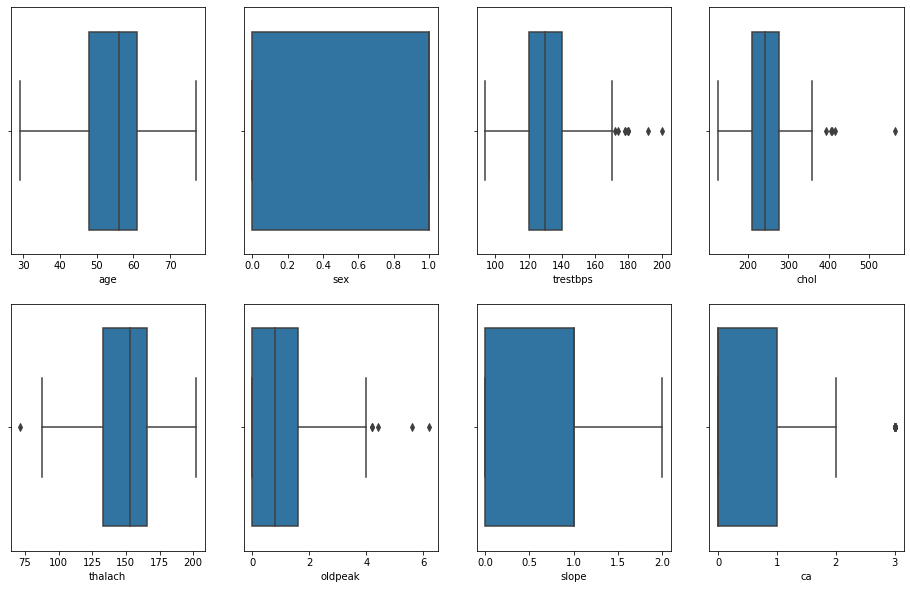

In [54]:
plt.figure(figsize=(16,10))
for i in range(len(eda_df.columns)):
    plt.subplot(2,4,i+1)
    sns.boxplot(eda_df[eda_df.columns[i]])
plt.show()

In [55]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'condition'],
      dtype='object')

# Creating the Correlation Heatmap

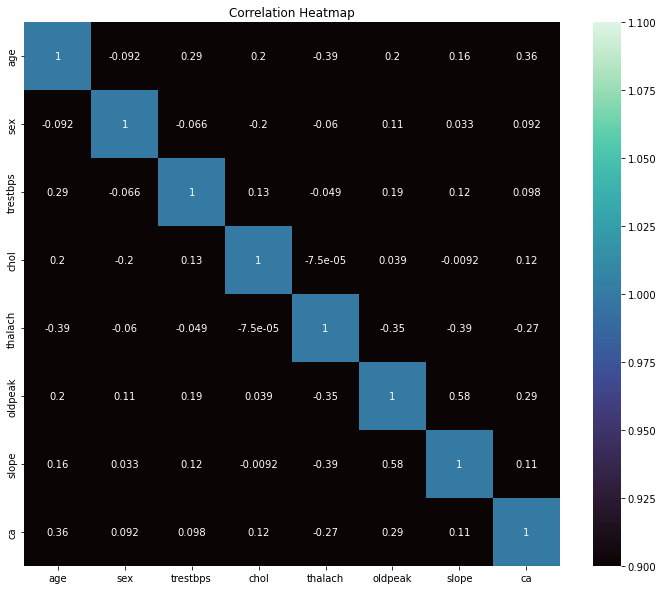

In [56]:
corr=eda_df.corr()
plt.figure(figsize=(12,10))
sns.heatmap(corr,annot=True,vmin=1.0,cmap='mako')
plt.title('Correlation Heatmap')
plt.show()

# Visualizing the class distribution with a pie chart

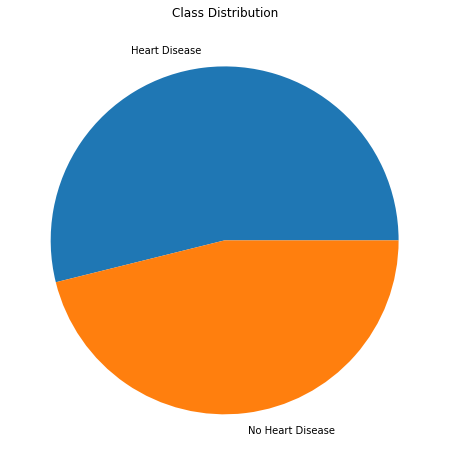

In [57]:
plt.figure(figsize=(8,8))
plt.pie(df['condition'].value_counts(),labels=['Heart Disease','No Heart Disease'])
plt.title('Class Distribution')
plt.show()

In [58]:
x,y=preprocess_input(df)
#showing the dataframe
x

ValueError: too many values to unpack (expected 2)

# Checking for the Null Values

In [ ]:
df.isna().sum()

* #  There are no missing Values in the dataset

# Checking for the Unique value in the dataset

In [ ]:
{column:list(df[column].unique()) for column in df.columns}

In [ ]:
nominal_features=['thal','cp','slope','ca']


In [ ]:
{column:len(df[column].unique()) for column in df.columns}

Loading the Dataset to the pandas d